In [ ]:
import scanpy as sc
import pandas as pd
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, facecolor='white')

: 

In [6]:
# adata1 ='/lustre/scratch123/hgi/teams/hgi/mo11/tmp_projects/harriet/qc/results/clustering/normalize=total_count.vars_to_regress=none.hvg_exclude=genes_remove_hvg_v001.scores=genes_score_v001/adatanormalized_pcacounts.h5ad'
adata1 ='/lustre/scratch123/hgi/teams/hgi/mo11/tmp_projects/harriet/qc/work/3a/65d6f4045b7b869a7129cbb81f15f6/adata-normalized_pca-counts.h5ad'
# adata1= '/lustre/scratch123/hgi/teams/hgi/mo11/tmp_projects/harriet/qc/work/03/27560c880c90e97b7b5f5019adc8bc/adata.h5ad'
ad1 = sc.read_h5ad(filename=adata1)
adata=ad1
adata.var_names_make_unique() 

In [6]:
adata1 ='/lustre/scratch123/hgi/teams/hgi/mo11/tmp_projects/ania/analysis_trego/results_rmCiteseq/citeseq/LRBA_B1_BM/antibody-LRBA_B1_BM.h5ad'
ad1 = sc.read_h5ad(filename=adata1)

In [7]:
ad1.var

,gene_ids,feature_types
anti-human_CD86,CD86,Antibody Capture
anti-human_CD274_(B7-H1_PD-L1),CD274_(B7-H1_PD-L1),Antibody Capture
anti-human_CD270_(HVEM_TR2),CD270_(HVEM_TR2),Antibody Capture
anti-human_CD155_(PVR),CD155_(PVR),Antibody Capture
anti-human_CD112_(Nectin-2),CD112_(Nectin-2),Antibody Capture
...,...,...
anti-human_HLA-E,HLA-E,Antibody Capture
anti-human_CD82,CD82,Antibody Capture
anti-human_CD101_(BB27),CD101_(BB27),Antibody Capture
anti-human_CD88_(C5aR),CD88_(C5aR),Antibody Capture


In [37]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

/software/hgi/installs/anaconda3/envs/mo11/lib/python3.9/site-packages/anndata/_core/anndata.py:1095: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  df_sub[k].cat.remove_unused_categories(inplace=True)


In [39]:

adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, inplace=True)

/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


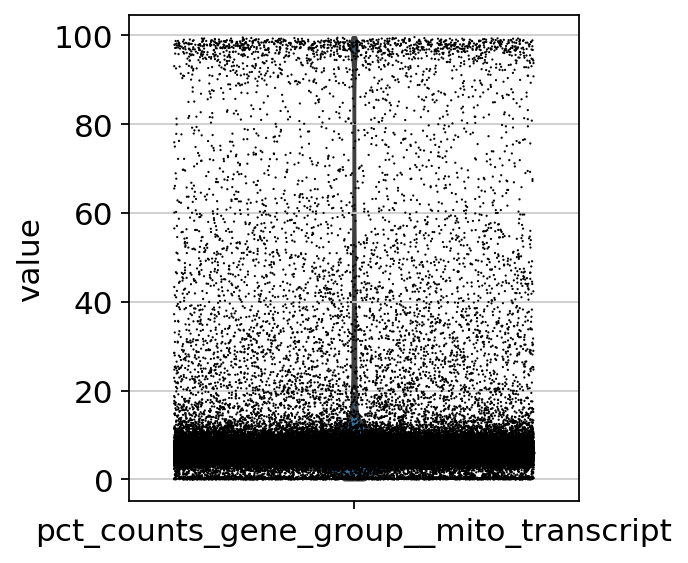

In [7]:
sc.pl.violin(adata, 'pct_counts_gene_group__mito_transcript',
             jitter=0.4)

/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:676: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:676: FutureWarning: iterit

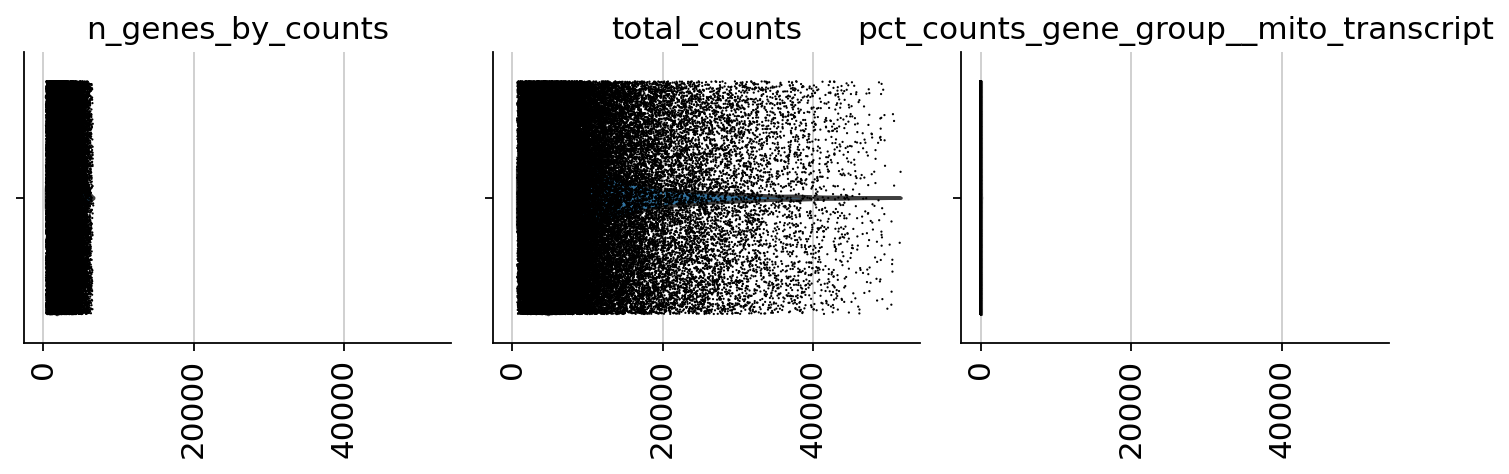

In [32]:
sc.pl.violin(ad1, keys=['n_genes_by_counts', 'total_counts', 'pct_counts_gene_group__mito_transcript'],
            jitter=0.4, multi_panel=True, rotation=90,scale='width')

/software/hgi/installs/anaconda3/envs/mo11/lib/python3.9/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(
/software/hgi/installs/anaconda3/envs/mo11/lib/python3.9/site-packages/anndata/compat/__init__.py:179: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  warn(
/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/nfs/users/nfs_m/mercury/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. F

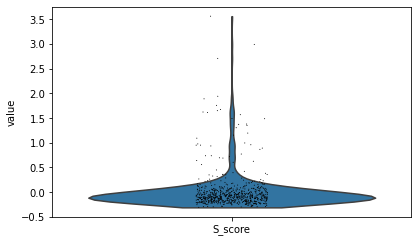

In [12]:
import scanpy as sc
adata = sc.datasets.pbmc68k_reduced()
sc.pl.violin(adata, keys='S_score')